In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

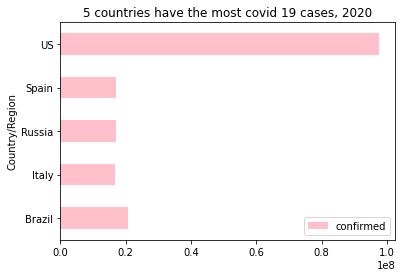

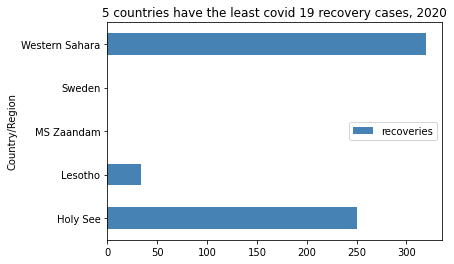

In [74]:
data1=pd.read_csv('./population.csv')
data2=pd.read_csv('./covid19.csv')
data1.fillna(0).replace('N.A.','NaN')
data2.fillna(0).replace('N.A.','NaN')
# data1.loc[:,['Country (or dependency)', 'Fert. Rate','Med. Age','Urban Pop %']].groupby('Country/Region').sum()
# data2.loc[:,['Country/Region', 'confirmed','deaths','recoveries']].groupby('Country/Region').sum()
sortconfirmed=data2.loc[:,['Country/Region', 'confirmed']].groupby('Country/Region').sum()
sortrecoveries=data2.loc[:,['Country/Region', 'recoveries']].groupby('Country/Region').sum()
highestcases = sortconfirmed.sort_values(by="confirmed", ascending=False).head(5)
lowestrecoveries = sortrecoveries.sort_values(by="recoveries", ascending=True).head(5)
# highestcases.plot.bar(x='Country/Region', y='confirmed', rot=0);
highestcases.groupby(['Country/Region']).sum().plot(kind='barh', y='confirmed',title='5 countries have the most covid 19 cases, 2020', color='#FFC0CB')
lowestrecoveries.groupby(['Country/Region']).sum().plot(kind='barh', y='recoveries',title='5 countries have the least covid 19 recovery cases, 2020', color='#4682B4')



,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1377233523,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,330610570,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,272931713,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,219992900,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...
196,Aruba,106675,0.43%,452,593,180,201.0,1.9,41,44%,0.00%
197,Tonga,105449,1.15%,1201,147,720,-800.0,3.6,22,24%,0.00%
198,U.S. Virgin Islands,104456,-0.15%,-153,298,350,-451.0,2,43,96%,0.00%
199,Seychelles,98224,0.62%,608,214,460,-200.0,2.5,34,56%,0.00%


,Unnamed: 0,Province/State,Country/Region,date,Lat,Long,confirmed,deaths,recoveries
8,8,Australian Capital Territory,Australia,1/22/2020,-35.4735,149.0124,0,0,0
9,9,New South Wales,Australia,1/22/2020,-33.8688,151.2093,0,0,0
10,10,Northern Territory,Australia,1/22/2020,-12.4634,130.8456,0,0,0
11,11,Queensland,Australia,1/22/2020,-28.0167,153.4000,0,0,0
12,12,South Australia,Australia,1/22/2020,-34.9285,138.6007,0,0,0
...,...,...,...,...,...,...,...,...,...
37027,37027,British Virgin Islands,United Kingdom,6/16/2020,18.4207,-64.6400,8,1,7
37028,37028,Turks and Caicos Islands,United Kingdom,6/16/2020,21.6940,-71.7979,12,1,11
37033,37033,"Bonaire, Sint Eustatius and Saba",Netherlands,6/16/2020,12.1784,-68.2385,7,0,7
37035,37035,Falkland Islands (Malvinas),United Kingdom,6/16/2020,-51.7963,-59.5236,13,0,13


covid19 data:
+)Total confirmed: 11500793
+)Total deaths: 497897
+)Total recoveries: 9038908
+)Death rate: 4.329240601061161 %
+)Recovery rate: 78.5937804462701 %
population data:
+)Total population: 7776834889
+)Total land area: (129663150, 'km^2')
Countries has the average(steadiest) world share from highest to lowest: 2    United States
3        Indonesia
4         Pakistan
5           Brazil
6          Nigeria
Name: Country (or dependency), dtype: object
+)World median age : 0.00425531914893617


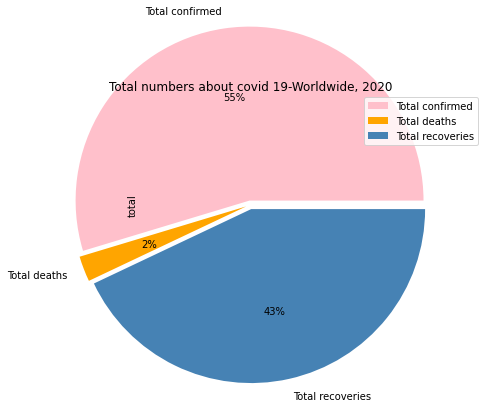

In [27]:
display(data1)
display(data2)
data1.fillna(0).replace('NaN','N.A.')
df1=data1.dropna(inplace=True)
data2.fillna(0).replace('N.A.','NaN')
df2=data2.dropna(inplace=True)
print("covid19 data:")
print("+)Total confirmed:",(data2['confirmed'].sum()))
print("+)Total deaths:",(data2['deaths'].sum()))
print("+)Total recoveries:",(data2['recoveries'].sum()))
deathrate=((data2['deaths'].sum()/data2['confirmed'].sum())*100)
print("+)Death rate:",deathrate,"%")
recoveryrate=((data2['recoveries'].sum()/data2['confirmed'].sum())*100)
totalconfirmed=data2['confirmed'].sum()
totaldeaths=data2['deaths'].sum()
totalrecoveries=data2['recoveries'].sum()
total = pd.DataFrame({ 'Name':['Total confirmed', 'Total deaths','Total recoveries'], 'total':[totalconfirmed,totaldeaths,totalrecoveries]})
total.reset_index(drop=True, inplace=True)
colors = ['pink', 'orange', 'steelblue']
explode = (0.05, 0.05, 0.05)
total.groupby(['Name']).sum().plot(kind='pie', y='total', autopct='%1.0f%%', colors=colors, explode=explode,radius=2,title='Total numbers about covid 19-Worldwide, 2020',).legend(bbox_to_anchor=(1, 1.02), loc='upper left')
print("+)Recovery rate:",recoveryrate,"%")
print("population data:")
print("+)Total population:",(data1['Population (2020)'].sum()))
print("+)Total land area:",(data1['Land Area (Km²)'].sum(),"km^2"))
sorted_worldshare=data1.sort_values(by=['World Share'], ascending=False)
fivedworldshare=sorted_worldshare.head()
print("Countries has the average(steadiest) world share from highest to lowest:",fivedworldshare['Country (or dependency)'])
medianage=bool(data1['Med. Age'].sum())
print("+)World median age :",medianage/235)






In [ ]:
# arrange=data2.loc[:,['Country/Region', 'confirmed','deaths','recoveries']].groupby('Country/Region').sum()
# fivedeaths=arrange.sort_values(by="deaths", ascending=True).head()
# fig,ax=plt.subplots(figsize=(30, 6))
# plt.title('Five countries have the most deaths:')
# plt.pie(fivedeaths['deaths'], labels =fivedeaths['Country/Region'])
# plt.legend(fivedeaths["Country/Region"]) 
# plt.show()
# # fdx=fivedeaths.plot.bar(x='Country/Region', y='deaths', rot=0)

In [ ]:
# arrange=data2.loc[:,['Country/Region', 'confirmed','deaths','recoveries']].groupby('Country/Region').sum()
# fivedeaths=arrange.sort_values(by="deaths", ascending=True).head()
# # name=fivedeaths['Country/Region']
# # fig,ax=plt.subplots(figsize=(30, 6))
# plt.title('Five countries have the most deaths:')
# # plt.pie(fivedeaths['deaths'], labels =name)
# # plt.legend(fivedeaths["Country/Region"]) 
# # plt.show()
# fdx=fivedeaths.plot.bar(x='Country/Region', y='deaths', rot=0)

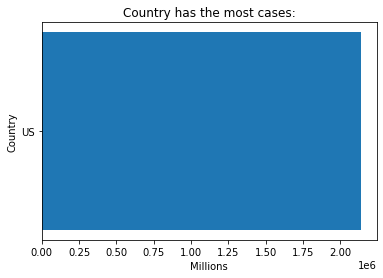

       Unnamed: 0 Province/State Country/Region       date      Lat     Long  \
37006       37006            NaN             US  6/16/2020  37.0902 -95.7129   
36754       36754            NaN             US  6/15/2020  37.0902 -95.7129   
36502       36502            NaN             US  6/14/2020  37.0902 -95.7129   
36250       36250            NaN             US  6/13/2020  37.0902 -95.7129   
35998       35998            NaN             US  6/12/2020  37.0902 -95.7129   

       confirmed  deaths  recoveries  
37006    2137731  116963      583503  
36754    2114026  116127      576334  
36502    2094058  115732      561816  
36250    2074526  115436      556606  
35998    2048986  114669      547386  


In [ ]:
sorted_confirmed=data2.sort_values(by=['confirmed'], ascending=False)
fivedconfirmed=sorted_confirmed.head()
x=fivedconfirmed['Country/Region']
y=fivedconfirmed['confirmed']
#graphing
plt.barh(x, y)
plt.title('Country has the most cases:')
plt.xlabel("Millions")
plt.ylabel("Country")
plt.show()
print(fivedconfirmed)

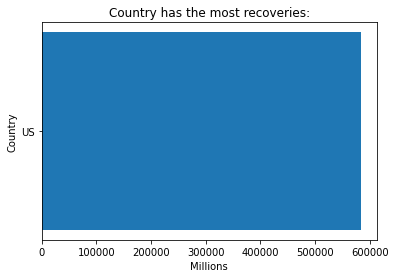

       Unnamed: 0 Province/State Country/Region       date      Lat     Long  \
37006       37006            NaN             US  6/16/2020  37.0902 -95.7129   
36754       36754            NaN             US  6/15/2020  37.0902 -95.7129   
36502       36502            NaN             US  6/14/2020  37.0902 -95.7129   
36250       36250            NaN             US  6/13/2020  37.0902 -95.7129   
35998       35998            NaN             US  6/12/2020  37.0902 -95.7129   

       confirmed  deaths  recoveries  
37006    2137731  116963      583503  
36754    2114026  116127      576334  
36502    2094058  115732      561816  
36250    2074526  115436      556606  
35998    2048986  114669      547386  
37006    583503
36754    576334
36502    561816
36250    556606
35998    547386
Name: recoveries, dtype: int64


In [ ]:
sorted_recoveries=data2.sort_values(by=['recoveries'], ascending=False)
fiverecoveries=sorted_recoveries.head(5)
x=fiverecoveries['Country/Region']
y=fiverecoveries['recoveries']
#graphing
plt.barh(x, y)
plt.title('Country has the most recoveries:')
plt.xlabel("Millions")
plt.ylabel("Country")
plt.show()
print(fiverecoveries)
print(y)
